## Librerías

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
import tensorflow as tf
#from tensorflow.keras import layers
#from tensorflow.keras import Model
#from tensorflow.keras import optimizers

#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras import callbacks

In [4]:
from keras import models
from keras import layers

In [5]:
import sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Load data

In [133]:
# Load the datasets
gdsc_dataset = pd.read_csv('./data/GDSC_DATASET.csv')
compounds_annotation = pd.read_csv('./data/Compounds-annotation.csv')
gdsc2_dataset = pd.read_csv('./data/GDSC2-dataset.csv')
#cell_lines_details = pd.read_excel('./data/Cell_Lines_Details.xlsx')
cell_lines_details = pd.read_csv('./data/Cell_Lines_Details.csv')

### Exploring data

In [134]:
# Display the first few rows of each dataset
display(gdsc_dataset.head())
display(compounds_annotation.head())
display(gdsc2_dataset.head())
display(cell_lines_details.head())

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


,DRUG_ID,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
0,1,MGH,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling
1,3,MGH,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling
2,5,MGH,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling
3,6,MGH,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling
4,9,MGH,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741991,0.734047,0.128059,-0.807232


,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug Response,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [135]:
# Check for missing values
print(gdsc_dataset.isnull().sum())
print(compounds_annotation.isnull().sum())
print(gdsc2_dataset.isnull().sum())
print(cell_lines_details.isnull().sum())

COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME                                      0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9366
GDSC Tissue descriptor 2                    9366
Cancer Type (matching TCGA label)          51446
Microsatellite instability Status (MSI)    12353
Screen Medium                               9366
Growth Properties                           9366
CNA                                         9366
Gene Expression                             9366
Methylation                                 9366
TARGET                                     27155
TARGET_PATHWAY                                 0
dtype: int64
DRUG_ID             0
SCREENING_SITE      0
DRUG_NAME   

In [136]:
# Drop rows with missing values for simplicity
gdsc_dataset = gdsc_dataset.dropna()
compounds_annotation = compounds_annotation.dropna()
gdsc2_dataset = gdsc2_dataset.dropna()
cell_lines_details = cell_lines_details.dropna()

## Mergin datasets

In [137]:
# Merge GDSC2 dataset with Cell Lines Details on COSMIC_ID
merged_df = pd.merge(gdsc2_dataset, cell_lines_details, left_on='COSMIC_ID', right_on='COSMIC identifier', how='left')

# Merge the resulting dataframe with Compounds Annotation on DRUG_ID
final_df = pd.merge(merged_df, compounds_annotation, on='DRUG_ID', how='left')

final_df.describe()

threshold = 0.5

print(final_df[final_df["AUC"] <= threshold].shape)
print(final_df[final_df["AUC"] > threshold].shape)

(7987, 37)
(205838, 37)


In [138]:
# Define features and target variable
X = final_df[[
    'DRUG_ID', 'Whole Exome Sequencing (WES)',
    'Copy Number Alterations (CNA)','Gene Expression', 'Methylation',
    'DRUG_ID','GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2',
    'Cancer Type (matching TCGA label)', 'Microsatellite instability Status (MSI)',
    'Growth Properties'
]]

y = final_df[['LN_IC50', 'AUC', 'Z_SCORE']]

#Hot one encoding variable that need to be hot-one encoded
X = pd.get_dummies(X, columns=[
    'Whole Exome Sequencing (WES)',
    'Copy Number Alterations (CNA)',
    'Gene Expression',
    'Methylation',
    'DRUG_ID',
    'GDSC Tissue descriptor 1',
    'GDSC Tissue descriptor 2',
    'Cancer Type (matching TCGA label)', 
    'Microsatellite instability Status (MSI)',
    'Growth Properties', 
])

X = X.astype(float)

In [139]:
print(y.shape)

(213825, 3)


In [161]:
X.shape

(213825, 352)

In [141]:
print(X.shape)

(213825, 609)


In [142]:
#X = X.drop(['Z_SCORE','AUC'], axis=1)
#print(X.shape)

In [143]:
X.columns

Index(['Whole Exome Sequencing (WES)_Y', 'Copy Number Alterations (CNA)_N',
       'Copy Number Alterations (CNA)_Y', 'Gene Expression_N',
       'Gene Expression_Y', 'Methylation_N', 'Methylation_Y', 'DRUG_ID_1003',
       'DRUG_ID_1004', 'DRUG_ID_1005',
       ...
       'Cancer Type (matching TCGA label)_SKCM',
       'Cancer Type (matching TCGA label)_STAD',
       'Cancer Type (matching TCGA label)_THCA',
       'Cancer Type (matching TCGA label)_UCEC',
       'Cancer Type (matching TCGA label)_UNABLE TO CLASSIFY',
       'Microsatellite instability Status (MSI)_MSI-H',
       'Microsatellite instability Status (MSI)_MSS/MSI-L',
       'Growth Properties_Adherent', 'Growth Properties_Semi-Adherent',
       'Growth Properties_Suspension'],
      dtype='object', length=609)

In [144]:
columns_names= X.columns
print(columns_names)

Index(['Whole Exome Sequencing (WES)_Y', 'Copy Number Alterations (CNA)_N',
       'Copy Number Alterations (CNA)_Y', 'Gene Expression_N',
       'Gene Expression_Y', 'Methylation_N', 'Methylation_Y', 'DRUG_ID_1003',
       'DRUG_ID_1004', 'DRUG_ID_1005',
       ...
       'Cancer Type (matching TCGA label)_SKCM',
       'Cancer Type (matching TCGA label)_STAD',
       'Cancer Type (matching TCGA label)_THCA',
       'Cancer Type (matching TCGA label)_UCEC',
       'Cancer Type (matching TCGA label)_UNABLE TO CLASSIFY',
       'Microsatellite instability Status (MSI)_MSI-H',
       'Microsatellite instability Status (MSI)_MSS/MSI-L',
       'Growth Properties_Adherent', 'Growth Properties_Semi-Adherent',
       'Growth Properties_Suspension'],
      dtype='object', length=609)


In [145]:
# Find duplicated columns
duplicate_columns = X.columns[X.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

Duplicate columns: Index(['DRUG_ID_1003', 'DRUG_ID_1004', 'DRUG_ID_1005', 'DRUG_ID_1006',
       'DRUG_ID_1007', 'DRUG_ID_1008', 'DRUG_ID_1009', 'DRUG_ID_1010',
       'DRUG_ID_1011', 'DRUG_ID_1012',
       ...
       'DRUG_ID_2175', 'DRUG_ID_2177', 'DRUG_ID_2359', 'DRUG_ID_2360',
       'DRUG_ID_2361', 'DRUG_ID_2362', 'DRUG_ID_2438', 'DRUG_ID_2439',
       'DRUG_ID_2498', 'DRUG_ID_2499'],
      dtype='object', length=257)


In [146]:
# Remove duplicated columns
X = X.loc[:, ~X.columns.duplicated()]

In [147]:
X = np.array(X)

In [148]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(171060, 352) (42765, 352) (171060, 3) (42765, 3)


In [150]:
y_test

,LN_IC50,AUC,Z_SCORE
191360,0.759339,0.861553,-0.948095
176657,4.168879,0.925970,0.874998
129812,4.554145,0.983653,0.508327
28144,4.533803,0.976061,-0.336717
27485,2.226808,0.884830,-0.674964
...,...,...,...
153266,4.808403,0.981245,0.591126
2608,1.072319,0.897055,-0.211715
1002,-3.113940,0.817964,0.173643
30495,-0.728229,0.560053,-1.773842


In [151]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(y.shape[1], activation='linear'))

/Users/sergiosantiago/developments/master/TFM/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

In [153]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │        11,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,875 (46.39 KB)

 Trainable params: 11,875 (46.39 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min',restore_best_weights=True)

In [155]:
history=model.fit(X_train, y_train, 
                  epochs=50, 
                  batch_size=16, 
                  validation_data=(X_test, y_test), 
                  callbacks=[early_stopping],
                  verbose=2)

Epoch 1/50
10692/10692 - 6s - 580us/step - loss: 1.0849 - mse: 1.0849 - val_loss: 0.9538 - val_mse: 0.9538
Epoch 2/50
10692/10692 - 6s - 540us/step - loss: 0.9004 - mse: 0.9004 - val_loss: 0.8838 - val_mse: 0.8838
Epoch 3/50
10692/10692 - 6s - 522us/step - loss: 0.8805 - mse: 0.8805 - val_loss: 0.8951 - val_mse: 0.8951
Epoch 4/50
10692/10692 - 7s - 668us/step - loss: 0.8677 - mse: 0.8677 - val_loss: 0.8631 - val_mse: 0.8631
Epoch 5/50
10692/10692 - 7s - 633us/step - loss: 0.8583 - mse: 0.8583 - val_loss: 0.8595 - val_mse: 0.8595
Epoch 6/50
10692/10692 - 7s - 675us/step - loss: 0.8514 - mse: 0.8514 - val_loss: 0.8600 - val_mse: 0.8600
Epoch 7/50
10692/10692 - 7s - 612us/step - loss: 0.8456 - mse: 0.8456 - val_loss: 0.8463 - val_mse: 0.8463
Epoch 8/50
10692/10692 - 6s - 593us/step - loss: 0.8404 - mse: 0.8404 - val_loss: 0.8479 - val_mse: 0.8479
Epoch 9/50
10692/10692 - 6s - 586us/step - loss: 0.8368 - mse: 0.8368 - val_loss: 0.8592 - val_mse: 0.8592
Epoch 10/50
10692/10692 - 6s - 597us/

In [156]:
pred = model.predict(X_test)

1337/1337 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


In [157]:
pred_X_train = model.predict(X_train)

5346/5346 ━━━━━━━━━━━━━━━━━━━━ 2s 340us/step


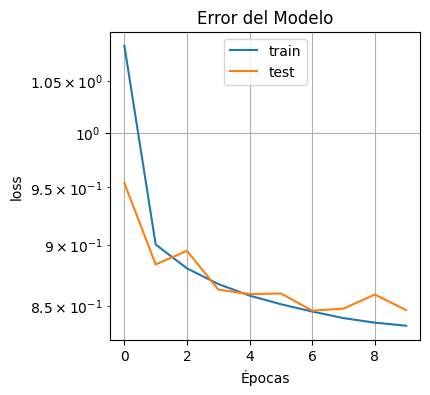

In [158]:
plt.figure(1, figsize=(4,4))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

plt.yscale("log")
plt.title('Error del Modelo')
plt.ylabel('loss')
plt.xlabel('Épocas')
plt.grid()
#plt.xlim(-0.5,20.1)
plt.legend(['train', 'test'], loc='upper center')

plt.savefig('MLP_OncoGenomicsDrugSensi_loss.jpg')
plt.show()

In [159]:
# Último valor del error en entrenamiento
final_train_error = history.history['mse'][-1]

# Último valor del error en validación
final_val_error = history.history['val_mse'][-1]

print(f"Error final en entrenamiento (MSE): {final_train_error}")
print(f"Error final en validación (MSE): {final_val_error}")

Error final en entrenamiento (MSE): 0.8344076871871948
Error final en validación (MSE): 0.8467298746109009


In [108]:
y_test

,LN_IC50,AUC,Z_SCORE
191360,0.759339,0.861553,-0.948095
176657,4.168879,0.925970,0.874998
129812,4.554145,0.983653,0.508327
28144,4.533803,0.976061,-0.336717
27485,2.226808,0.884830,-0.674964
...,...,...,...
153266,4.808403,0.981245,0.591126
2608,1.072319,0.897055,-0.211715
1002,-3.113940,0.817964,0.173643
30495,-0.728229,0.560053,-1.773842


In [109]:
print(pred)

[[ 1.9347715e+00  8.9900357e-01 -3.1404495e-03]
 [ 3.6431410e+00  9.4828457e-01  6.0939419e-01]
 [ 3.4835162e+00  9.5770127e-01 -8.3218873e-02]
 ...
 [-4.1474123e+00  7.0566708e-01 -2.1111581e-01]
 [ 9.2771339e-01  7.6515889e-01 -8.4533393e-01]
 [ 1.9626262e+00  7.9885453e-01 -2.3379621e-01]]


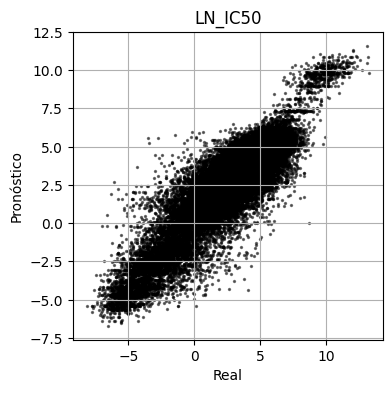

In [110]:
# y = final_df[['LN_IC50', 'AUC', 'Z_SCORE']]

plt.figure(1, figsize=(4,4))

plt.scatter(np.array(y_test['LN_IC50']), pred[:,0], s=2, alpha=0.5, color="black")
plt.grid()

#plt.plot([5,50],[5,50])
plt.ylabel('Pronóstico')
plt.xlabel('Real')
plt.title('LN_IC50')

plt.savefig('MLP_OncoGenomicsDrugSensi_LN_IC50_TruePred.jpg')
plt.show()

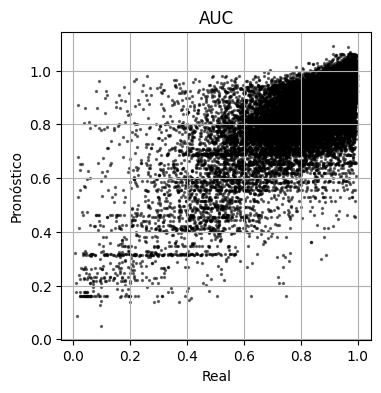

In [111]:
# y = final_df[['LN_IC50', 'AUC', 'Z_SCORE']]

plt.figure(1, figsize=(4,4))

plt.scatter(np.array(y_test['AUC']), pred[:,1], s=2, alpha=0.5, color="black")
plt.grid()

#plt.plot([5,50],[5,50])
plt.ylabel('Pronóstico')
plt.xlabel('Real')
plt.title('AUC')

plt.savefig('MLP_OncoGenomicsDrugSensi_AUC_TruePred.jpg')
plt.show()

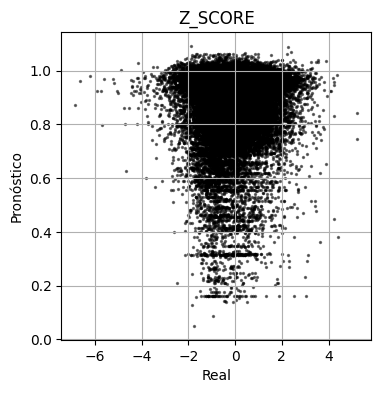

In [112]:
# y = final_df[['LN_IC50', 'AUC', 'Z_SCORE']]

plt.figure(1, figsize=(4,4))

plt.scatter(np.array(y_test['Z_SCORE']), pred[:,1], s=2, alpha=0.5, color="black")
plt.grid()

#plt.plot([5,50],[5,50])
plt.ylabel('Pronóstico')
plt.xlabel('Real')
plt.title('Z_SCORE')

plt.savefig('MLP_OncoGenomicsDrugSensi_Z_SCORE_TruePred.jpg')
plt.show()

In [113]:
final_df2 = final_df.drop(columns=['DATASET'])
aux = final_df2.loc[final_df2["DRUG_NAME_x"] != final_df2['DRUG_NAME_y']]
print(len(final_df2))
print(len(aux))
print(aux["DRUG_NAME_x"].unique())
print(aux["DRUG_NAME_y"].dropna().unique())

213825
40121
['Staurosporine' 'JNK Inhibitor VIII' 'Nutlin-3a (-)' 'Mirin' 'RO-3306'
 'CCT007093' 'BI-2536' 'BMS-345541' 'Bleomycin (50 uM)' 'LCL161'
 'BDF00022089a' 'GSK2256098C' 'GSK2276186C' 'GSK2110183B' 'GSK626616AC'
 'GSK3337463A' 'GSK2830371A' 'LMB_AB1' 'LMB_AB2' 'LMB_AB3' 'Oxaliplatin'
 'Topotecan' 'Mitoxantrone' 'Bleomycin' 'Fulvestrant' 'OF-1' 'MN-64'
 'BDP-00009066' 'ABT737' 'AZD3759' 'AZD5363' 'ICL-SIRT078' 'GSK343'
 'UNC0638' 'AGK2' 'BIBR-1532' 'Pyridostatin' 'LJI308' 'AZ6102' 'CT7033-2'
 'GSK-LSD1-2HCl ' '5-azacytidine' 'A-366' 'CPI-637' 'UNC0379' 'AT13148'
 'PFI-1' 'SGC0946' 'GSK2830371']
[]


In [114]:
display(final_df.columns)
non_numeric_columns = final_df.select_dtypes(exclude=['number']).columns
print("no numeric: ",non_numeric_columns)
for col in final_df.columns:
    print(f" {col} ---> {final_df[col].unique()}")
encoder = LabelEncoder()

for col in final_df2.select_dtypes(exclude=["number"]).columns:
    final_df2[col] = encoder.fit_transform(final_df2[col])

Index(['DATASET', 'NLME_RESULT_ID', 'NLME_CURVE_ID', 'COSMIC_ID',
       'CELL_LINE_NAME', 'SANGER_MODEL_ID', 'TCGA_DESC', 'DRUG_ID',
       'DRUG_NAME_x', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'COMPANY_ID',
       'WEBRELEASE', 'MIN_CONC', 'MAX_CONC', 'LN_IC50', 'AUC', 'RMSE',
       'Z_SCORE', 'Sample Name', 'COSMIC identifier',
       'Whole Exome Sequencing (WES)', 'Copy Number Alterations (CNA)',
       'Gene Expression', 'Methylation', 'Drug Response',
       'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2',
       'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium',
       'Growth Properties', 'SCREENING_SITE', 'DRUG_NAME_y', 'SYNONYMS',
       'TARGET', 'TARGET_PATHWAY'],
      dtype='object')

no numeric:  Index(['DATASET', 'CELL_LINE_NAME', 'SANGER_MODEL_ID', 'TCGA_DESC',
       'DRUG_NAME_x', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'WEBRELEASE',
       'Sample Name', 'Whole Exome Sequencing (WES)',
       'Copy Number Alterations (CNA)', 'Gene Expression', 'Methylation',
       'Drug Response', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2',
       'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium',
       'Growth Properties', 'SCREENING_SITE', 'DRUG_NAME_y', 'SYNONYMS',
       'TARGET', 'TARGET_PATHWAY'],
      dtype='object')
 DATASET ---> ['GDSC2']
 NLME_RESULT_ID ---> [343]
 NLME_CURVE_ID ---> [15946310 15946548 15946830 ... 16188953 16189493 16189775]
 COSMIC_ID ---> [ 683667  684052  684057  684059  684062  684072  687448  687452  687455
  687457  687459  687505  687506  687514  687561  687562  687563  687568
  687586  687588  687590  687592  687596  687600  687777  687780  687787
  687794  687798  687799  687800

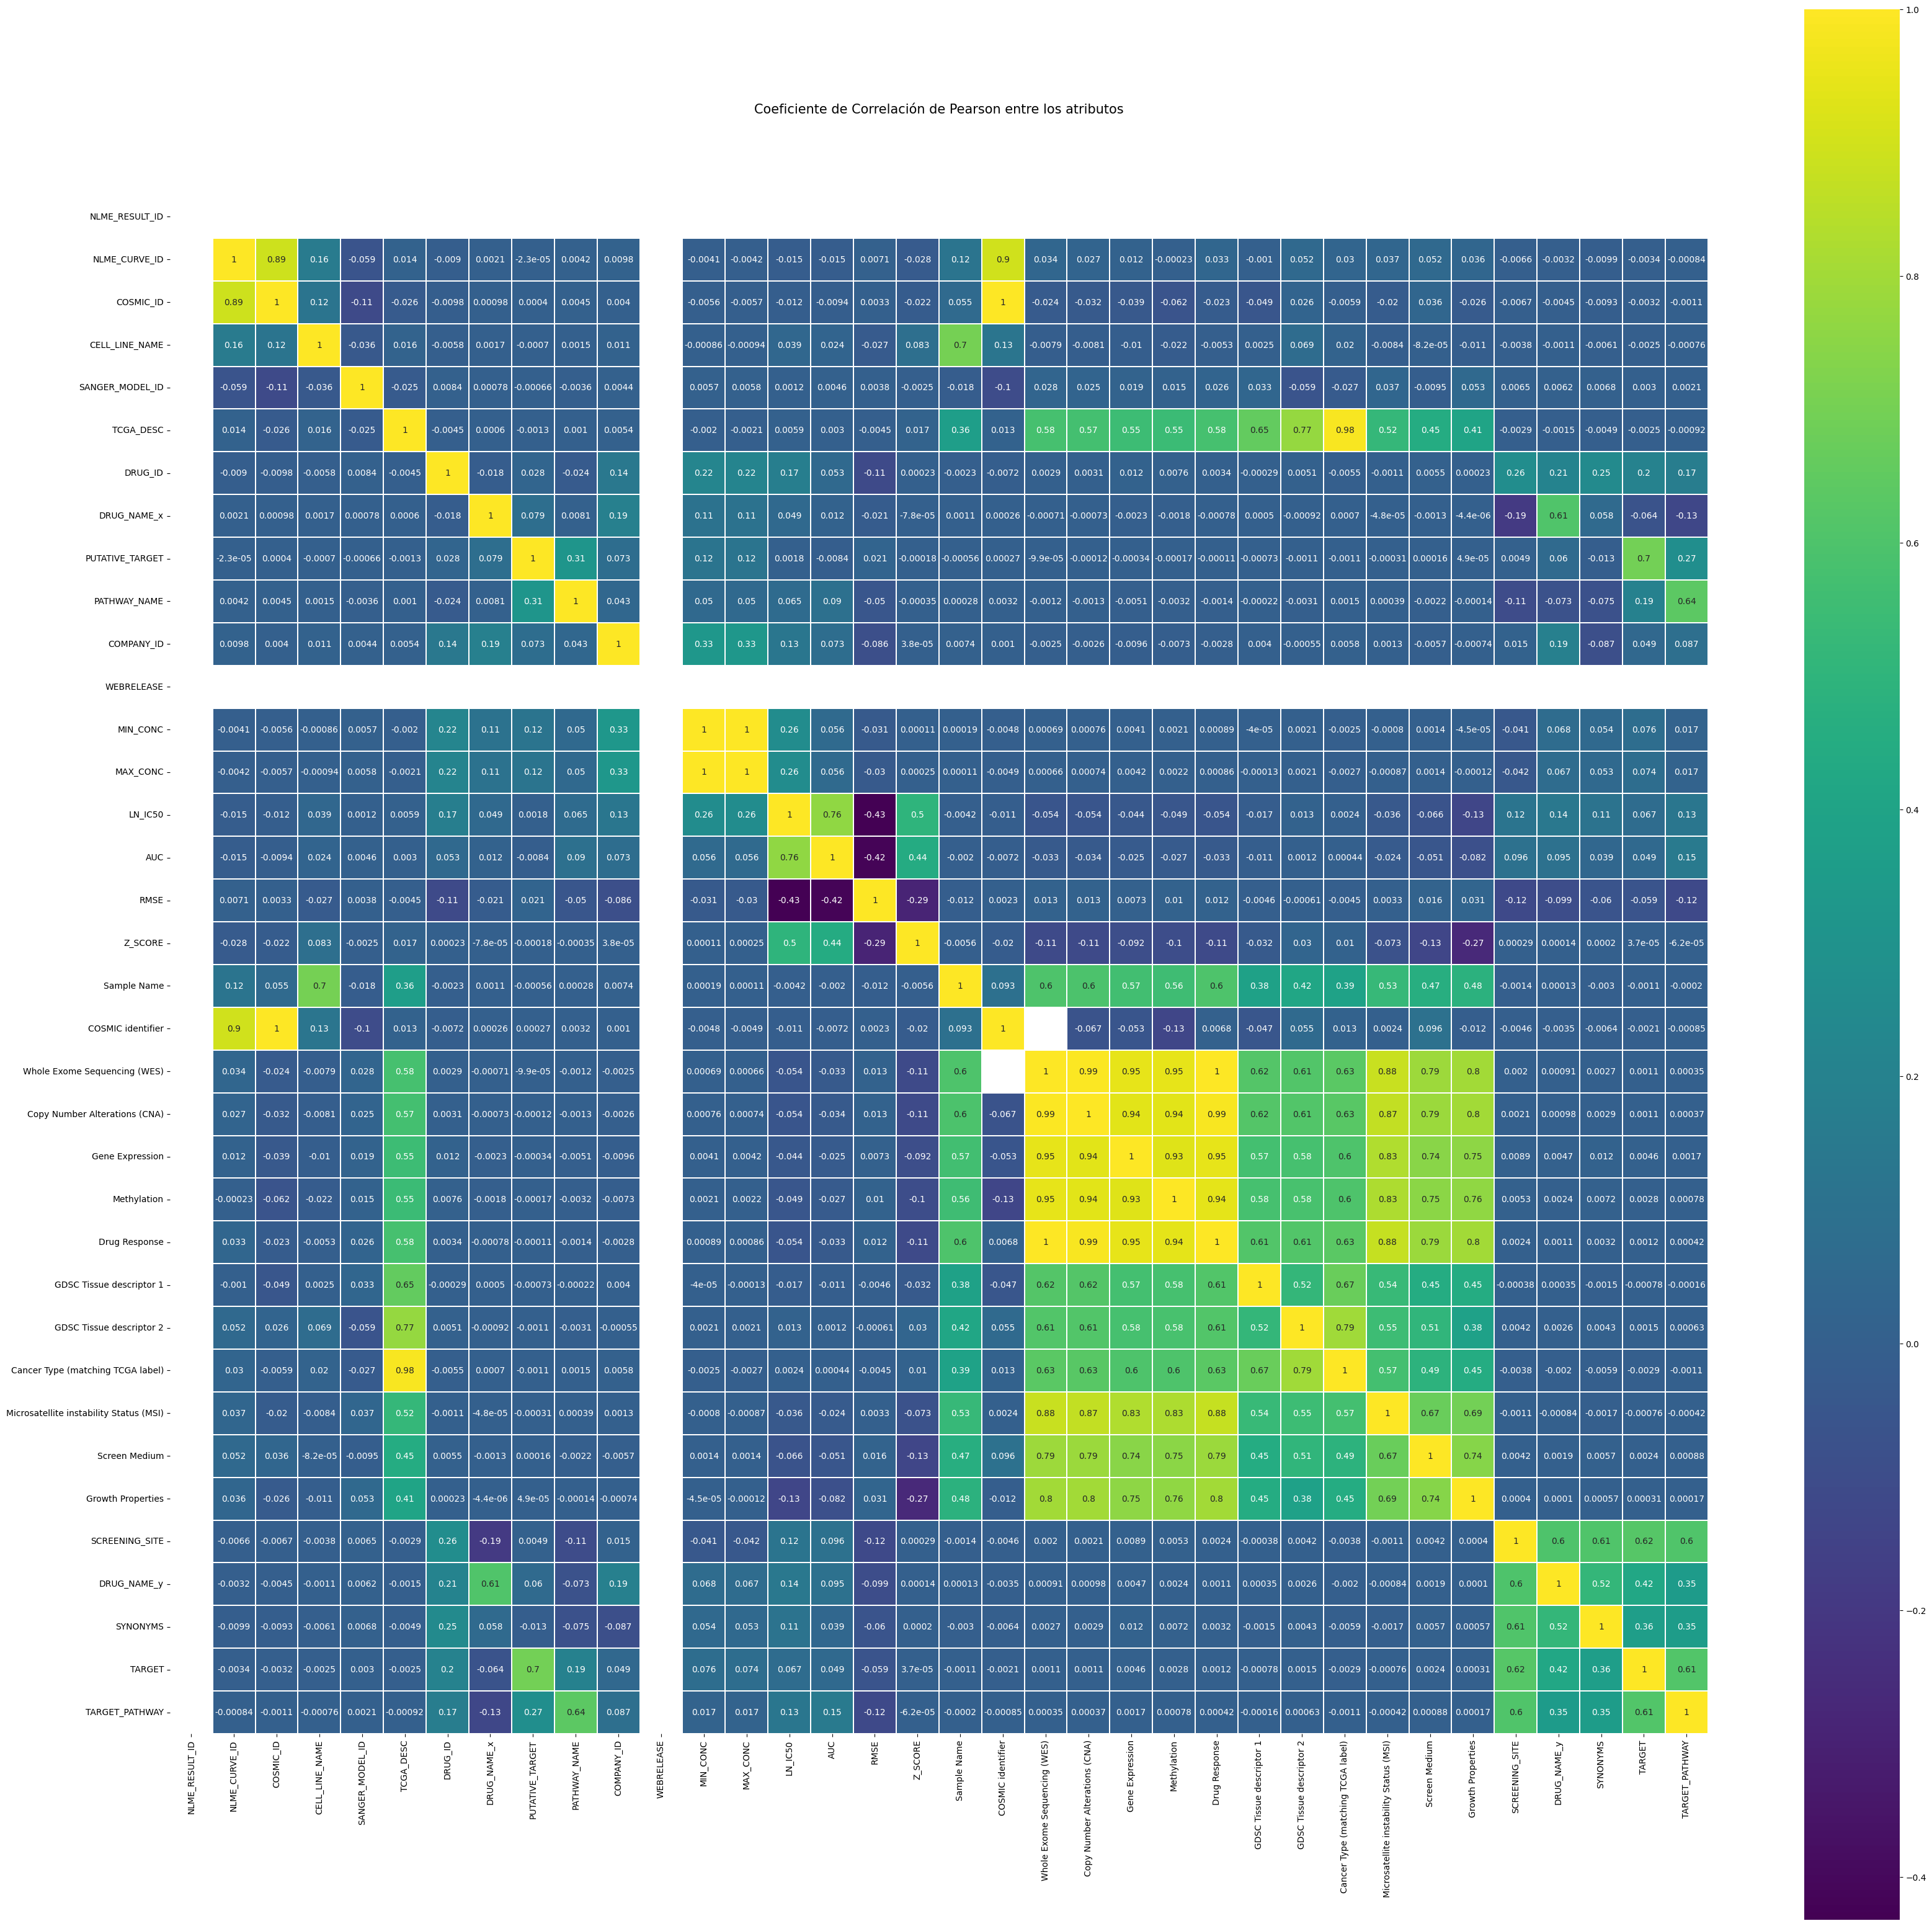

In [68]:
corr = final_df2.corr()
plt.figure(figsize=(40,40))
plt.title('Coeficiente de Correlación de Pearson entre los atributos', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0,
            square=True, cmap='viridis', linecolor='white', annot=True)
plt.savefig("correlationMatrix.png", bbox_inches="tight")

## Shap Algorithm

In [44]:
import shap

/Users/sergiosantiago/developments/master/TFM/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
print(X_train.shape)
X_train = np.squeeze(X_train)
print(X_train.shape)
print(type(X_train))

(171060, 352)
(171060, 352)
<class 'numpy.ndarray'>


In [46]:
n_events= 250 # mejor usar 100, he ejecutado con 200 pero más lento

In [47]:
# Este funcional
explainer_XAI = shap.KernelExplainer(model,X_train[0:n_events])
# Este también funciona
#explainer_XAI = shap.GradientExplainer(model,train_data[0:n_events])

Using 250 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [48]:
# El resultado es una lista que incluye un solo array en su interior, por eso siempre pongo shap_values[0]
shap_values = explainer_XAI.shap_values(X_train[0:n_events])
print(type(shap_values))

100%|██████████| 250/250 [10:25<00:00,  2.50s/it]

<class 'numpy.ndarray'>


In [49]:
print(shap_values.shape)
shap_values=np.squeeze(shap_values)
print(shap_values.shape)
print(type(shap_values))

(250, 352, 3)
(250, 352, 3)
<class 'numpy.ndarray'>


<Figure size 600x600 with 0 Axes>

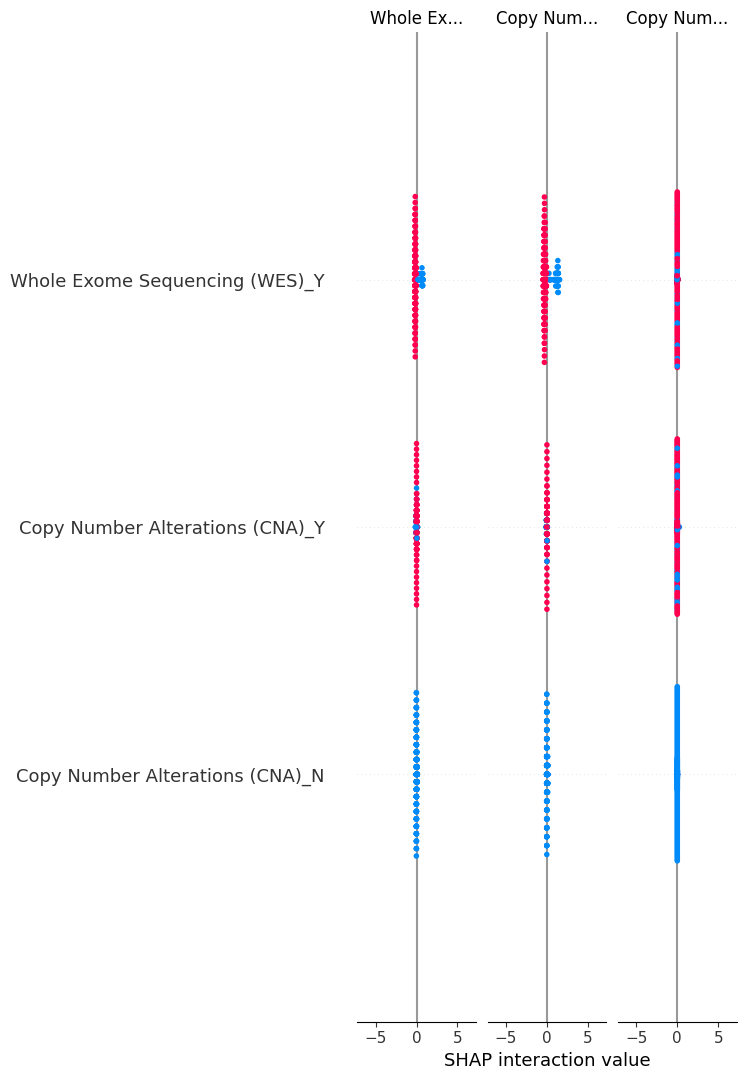

In [50]:
plt.figure(1, figsize=(6,6))
plt.subplots_adjust(wspace=1, hspace=0.5,left=0.20,right=0.95,top=0.90,bottom=0.10)
shap.summary_plot(shap_values, X_train[0:n_events], 
                  feature_names=columns_names,
                  max_display = 12, show=False)
plt.savefig('ShapSummaryPlot_OncoGemomicsDrugsSensitivity_MLP_'+str(n_events)+
            '_n_columns_'+str(len(columns_names))+
            '.jpg')

In [51]:
print(shap_values[0].shape)
print(X_train[0].shape)
print(type(shap_values[0]))
print(type(X_train[0]))

(352, 3)
(352,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [52]:
# Explainability of the event of trainingset of index the value idx.
idx=50

print(", con etiqueta: ",y_train[idx], pred_X_train[idx])

def myexplanation(shap_values, idx):
    my_exp = shap.Explanation(
    values =  shap_values[idx],
    data = X_train[idx],
    feature_names = columns_names,
    #base_values = explainer_M3XAI.expected_value[0] # este también funciona
    base_values = explainer_XAI.expected_value.mean()
    )
    return my_exp

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

plt.subplots_adjust(top = 0.9, left=0.40, right=0.91, bottom = 0.12)
fig.text(0.2, 0.9, "Y: "+str(np.round(y_train[idx],2))+
         ', predicted: ' +str(np.round(pred_X_train[idx],2)), fontsize=12)

shap.plots.waterfall( myexplanation(shap_values, idx), max_display = 12, show=False)

plt.savefig('ShapWaterFallPlot_event_OncoGemomicsDrugsSensitivity_MLP_'+str(idx)+
            '_n_columns_'+str(len(columns_names))+
            '.jpg')

KeyError: 50